# Лабораторная работа №2: Поиск особенностей в изображении
Выполнила: студентка гр. 1384 Усачева Дарья.

## Задача
Реализовать на языке Python  с использованием библиотеки OpenCV программу, выполняющее поиск окружностей в изображении путем преобразования Хо (Hough).

## Входные данные
1.	цветное изображение в формате bmp, jpg 
2.	минимальное расстояние между центрами окружностей;
3.	минимальный радиус окружности;
4.	максимальный радиус окружности.

## Выходные данные
1.	цветное изображение в формате bmp (result.bmp)

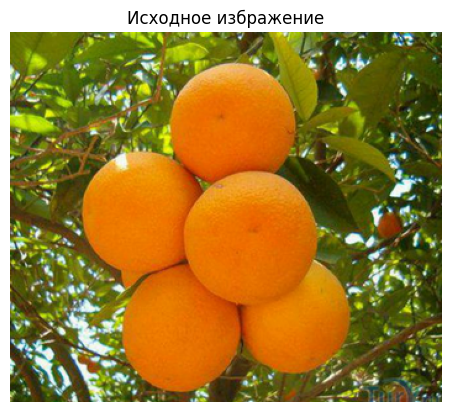

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '2.bmp'
min_dist = 30 
min_radius = 30  
max_radius = 90
image = cv2.imread(image_path)
if image is None:
    print("Не удалось загрузить изображение.")
def display_image(image, title=''):
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()
display_image(image, "Исходное избражение")

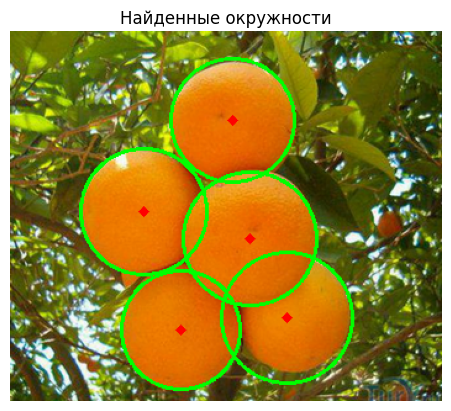

True

In [78]:
def find_circles(image, min_dist, min_radius, max_radius):
    output = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 7)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=min_dist,
                               param1=95, param2=30, minRadius=min_radius, maxRadius=max_radius)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)
    return output

display_image(find_circles(image, min_dist, min_radius, max_radius), "Найденные окружности")
cv2.imwrite('result.bmp', find_circles(image, min_dist, min_radius, max_radius))